In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import astropy as ast
import os
import sys
import math
import matplotlib.pyplot as plt
import xlrd
import openpyxl

In [2]:
os.chdir('Desktop')

In [3]:
gena=pd.read_csv('.\capstone proj\genacop.csv')
mratio=pd.read_csv('.\capstone proj\mration.csv')

In [4]:
gena.columns

Index(['recno', 'Name', 'fb', 'fc', 'RAJ2000', 'DEJ2000', 'logTe', 'Fe/H',
       'Dist', 'VMag', 'e_VMag', 'age', 'clage', 'chage', 'Rmin', 'Rmax',
       'ecc', 'zmax', 'Vmag', 'b-y', 'm1', 'c1'],
      dtype='object')

In [5]:
#VMag is absol, Vmag is visual
#m1 stroemegen...((v-b)-(b-y)))
#c1 stroemegen....((u-v)-(v-b))

In [6]:
gena.isnull().sum()

recno         0
Name          0
fb            0
fc            0
RAJ2000       0
DEJ2000       0
logTe       288
Fe/H        288
Dist        596
VMag        596
e_VMag      596
age        2331
clage      3445
chage      2124
Rmin       3162
Rmax       3162
ecc        3162
zmax       3162
Vmag          0
b-y           0
m1            0
c1            0
dtype: int64

In [7]:
gena.describe()

,recno,fb,fc,logTe,Fe/H,Dist,VMag,e_VMag,age,clage,chage,Rmin,Rmax,ecc,zmax,Vmag,b-y,m1,c1
count,16682.000000,16682.000000,16682.000000,16394.000000,16394.000000,16086.000000,16086.000000,16086.000000,14351.000000,13237.000000,14558.000000,13520.000000,13520.000000,13520.000000,13520.000000,16682.000000,16682.000000,16682.000000,16682.000000
mean,8341.500000,0.373337,0.012888,3.783675,-0.166543,91.647893,3.433385,0.162228,3.847147,3.126970,4.818320,6.831822,8.626397,0.118911,0.238896,7.893304,0.349308,0.187115,0.436111
std,4815.822931,0.483705,0.145312,0.036173,0.237178,64.586222,1.233412,0.086970,3.218388,2.630965,3.852542,0.987846,0.950437,0.089220,0.474743,0.934169,0.084476,0.073065,0.126444
min,1.000000,0.000000,0.000000,3.637000,-2.700000,1.000000,-3.010000,0.000000,0.200000,0.200000,0.300000,0.030000,7.440000,0.000000,0.000000,-0.290000,0.204000,0.014000,-0.265000
25%,4171.250000,0.000000,0.000000,3.762000,-0.260000,54.000000,2.670000,0.090000,1.800000,1.500000,2.000000,6.430000,8.120000,0.060000,0.080000,7.432000,0.290000,0.152000,0.346000
50%,8341.500000,0.000000,0.000000,3.788000,-0.140000,79.000000,3.360000,0.150000,2.600000,2.200000,3.100000,7.010000,8.410000,0.100000,0.150000,7.992000,0.339000,0.166000,0.417000
75%,12511.750000,1.000000,0.000000,3.810000,-0.030000,112.000000,4.160000,0.260000,5.000000,3.600000,6.600000,7.550000,8.880000,0.150000,0.260000,8.435000,0.400000,0.193000,0.501000
max,16682.000000,1.000000,2.000000,3.848000,0.730000,2192.000000,10.870000,0.280000,17.500000,16.800000,17.500000,8.410000,42.390000,1.000000,19.640000,12.703000,1.088000,0.847000,1.035000


In [8]:
gena.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16682 entries, 0 to 16681
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   recno    16682 non-null  int64  
 1   Name     16682 non-null  object 
 2   fb       16682 non-null  int64  
 3   fc       16682 non-null  int64  
 4   RAJ2000  16682 non-null  object 
 5   DEJ2000  16682 non-null  object 
 6   logTe    16394 non-null  float64
 7   Fe/H     16394 non-null  float64
 8   Dist     16086 non-null  float64
 9   VMag     16086 non-null  float64
 10  e_VMag   16086 non-null  float64
 11  age      14351 non-null  float64
 12  clage    13237 non-null  float64
 13  chage    14558 non-null  float64
 14  Rmin     13520 non-null  float64
 15  Rmax     13520 non-null  float64
 16  ecc      13520 non-null  float64
 17  zmax     13520 non-null  float64
 18  Vmag     16682 non-null  float64
 19  b-y      16682 non-null  float64
 20  m1       16682 non-null  float64
 21  c1       166

In [9]:
gena

,recno,Name,fb,fc,RAJ2000,DEJ2000,logTe,Fe/H,Dist,VMag,...,clage,chage,Rmin,Rmax,ecc,zmax,Vmag,b-y,m1,c1
0,1,HD 15,1,0,00 05 17.8,+48 28 37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.304,0.592,0.486,0.211
1,2,HD 16,0,0,00 05 12.4,+36 18 13,3.803,0.10,343.0,0.42,...,0.7,0.9,6.38,8.28,0.13,0.17,8.092,0.311,0.175,0.631
2,3,HD 23,0,0,00 05 07.4,-52 09 06,3.776,-0.17,42.0,4.44,...,0.4,6.3,6.39,8.88,0.16,0.14,7.552,0.366,0.175,0.340
3,4,HD 24,1,0,00 05 09.7,-62 50 42,3.768,-0.33,69.0,3.96,...,7.7,9.8,7.75,9.11,0.08,0.36,8.146,0.377,0.168,0.313
4,5,HD 25,0,0,00 05 22.3,+49 46 11,3.824,-0.30,79.0,3.09,...,1.8,2.2,7.57,8.96,0.08,0.23,7.590,0.256,0.138,0.513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16677,16677,HD 293178,0,0,07 06 47.5,+00 23 20,3.801,-0.54,195.0,3.14,...,2.8,4.6,NaN,NaN,NaN,NaN,9.585,0.300,0.117,0.440
16678,16679,HD 311573,0,0,09 31 01.1,-73 05 18,3.792,-0.44,295.0,1.89,...,1.9,2.5,7.38,8.03,0.04,0.27,9.241,0.321,0.129,0.517
16679,16680,HD 321320,0,0,18 05 55.6,-36 35 58,3.729,-1.84,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.189,0.434,0.075,0.160
16680,16681,HD 349063,0,0,18 38 34.6,+20 37 37,3.748,-0.50,65.0,5.27,...,NaN,14.7,6.12,9.88,0.23,0.05,9.320,0.415,0.196,0.251


In [10]:
gena['age'][2]

3.7

In [11]:
gena=gena.dropna(subset=['logTe','Dist', 'age', 'VMag' ])


In [12]:
gena

,recno,Name,fb,fc,RAJ2000,DEJ2000,logTe,Fe/H,Dist,VMag,...,clage,chage,Rmin,Rmax,ecc,zmax,Vmag,b-y,m1,c1
1,2,HD 16,0,0,00 05 12.4,+36 18 13,3.803,0.10,343.0,0.42,...,0.7,0.9,6.38,8.28,0.13,0.17,8.092,0.311,0.175,0.631
2,3,HD 23,0,0,00 05 07.4,-52 09 06,3.776,-0.17,42.0,4.44,...,0.4,6.3,6.39,8.88,0.16,0.14,7.552,0.366,0.175,0.340
3,4,HD 24,1,0,00 05 09.7,-62 50 42,3.768,-0.33,69.0,3.96,...,7.7,9.8,7.75,9.11,0.08,0.36,8.146,0.377,0.168,0.313
4,5,HD 25,0,0,00 05 22.3,+49 46 11,3.824,-0.30,79.0,3.09,...,1.8,2.2,7.57,8.96,0.08,0.23,7.590,0.256,0.138,0.513
6,7,HD 39,1,0,00 05 29.0,+34 06 20,3.785,-0.40,97.0,2.92,...,3.6,4.6,7.26,8.40,0.07,0.56,7.852,0.337,0.133,0.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16657,16657,HD 240051,0,0,22 46 08.7,+58 04 05,3.755,-0.23,65.0,4.56,...,8.0,13.7,NaN,NaN,NaN,NaN,8.634,0.409,0.190,0.335
16664,16664,HD 285571,0,1,04 13 10.9,+16 46 00,3.751,-0.21,70.0,4.93,...,NaN,14.6,6.01,8.06,0.15,0.62,9.148,0.417,0.209,0.312
16677,16677,HD 293178,0,0,07 06 47.5,+00 23 20,3.801,-0.54,195.0,3.14,...,2.8,4.6,NaN,NaN,NaN,NaN,9.585,0.300,0.117,0.440
16678,16679,HD 311573,0,0,09 31 01.1,-73 05 18,3.792,-0.44,295.0,1.89,...,1.9,2.5,7.38,8.03,0.04,0.27,9.241,0.321,0.129,0.517


In [13]:
m1=gena['m1'][1]
c1=gena['c1'][1]
by=gena['b-y'][1]
c3=.45-(3.98*by)+(5.08*by**2.)

In [14]:
gena['Fe/H'][1]

0.1

In [15]:
ff=9.6-(61.16*m1)+(81.25*m1*by)+(224.65*m1**2.*by)-(153.18*m1*by**2.)+((12.23-(90.23*m1)+(3870*by))*np.log(m1-c3))

In [16]:
ff

-899.5043489068743

In [17]:
mratio

,recno,Name,mratio,e_mratio
0,1,HD 24,0.962,0.007
1,2,HD 483,0.995,0.002
2,3,HD 1854,1.865,NaN
3,4,HD 2475,0.940,0.050
4,5,HD 3405,0.940,0.010
...,...,...,...,...
505,506,HD 223537,0.946,0.011
506,507,HD 223778,0.955,0.006
507,508,HD 224355,0.994,NaN
508,509,HD 224410,0.784,NaN


In [18]:
#joining genacop and mratio on Name
#gena_join=pd.merge(gena, mratio, how='outer', left_on='Name', right_on='Name')

In [19]:
#gena_join

In [20]:
#dropped column recno_y
#gena_join=gena_join.drop(columns='recno_y')

In [21]:
#gena_join

In [22]:
#finding luminosity, M is aBSOLUTE MAGNITUDEFOR THIS CELL
#M-M_solar=-2.5log(L/L_solar)
#log(L/L_solar)=(((M-M_solar)/(-2.5))), M_solar=4.74
log_L_div_Ls=(((gena['VMag']-4.74)/(-2.5)))
L_div_Ls=10**(((gena['VMag']-4.74)/(-2.5))) 

#lumin of sun is 3.83 × 10**33 ergs per second)
L=L_div_Ls*(3.83 * 10**(33.))#this is like L/L_solar-->L=[10**(((gena['VMag']-4.74)/(-2.5)))] L_solar

In [23]:
log_L_div_Ls

1        1.728
2        0.120
3        0.312
4        0.660
6        0.728
         ...  
16657    0.072
16664   -0.076
16677    0.640
16678    1.140
16681    0.488
Name: VMag, Length: 14351, dtype: float64

In [24]:
gena['log(L/L_s)']=log_L_div_Ls

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
L_div_Ls

1        53.456436
2         1.318257
3         2.051162
4         4.570882
6         5.345644
           ...    
16657     1.180321
16664     0.839460
16677     4.365158
16678    13.803843
16681     3.076097
Name: VMag, Length: 14351, dtype: float64

In [26]:
gena['L_div_Ls']=L_div_Ls

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
L

1        2.047381e+35
2        5.048923e+33
3        7.855951e+33
4        1.750648e+34
6        2.047381e+34
             ...     
16657    4.520628e+33
16664    3.215132e+33
16677    1.671856e+34
16678    5.286872e+34
16681    1.178145e+34
Name: VMag, Length: 14351, dtype: float64

In [28]:
gena['L']=L

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
# logging the Te
Te=10**gena['logTe']

In [30]:
gena['Te']=Te

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
#finding radius R, sigma= 5.670374*10**−5 erg⋅cm−2⋅s−1⋅K−4., T_solar=5780, radius_solar=6.957*10**10 cm
#L=4*pi*(R**2)*sigma*T**4 
R=((4*(5.670374*10**(-5))*np.pi*Te**4)**(-.5))*(L)**(.5)
R_Rs=R/(6.957*10**10.) #doing this will take R_solar out of R(value) to make it R=R(value)*R_solar

In [32]:
R

1        4.199413e+11
2        7.467730e+10
3        9.664705e+10
4        1.114779e+11
6        1.442742e+11
             ...     
16657    7.783745e+10
16664    6.686342e+10
16677    1.211124e+11
16678    2.244857e+11
16681    1.189018e+11
Length: 14351, dtype: float64

In [33]:
R_Rs

1        6.036241
2        1.073412
3        1.389206
4        1.602384
6        2.073799
           ...   
16657    1.118836
16664    0.961096
16677    1.740871
16678    3.226760
16681    1.709097
Length: 14351, dtype: float64

In [34]:
gena['R']=R
gena['R_Rs']=R_Rs

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
R_from_L_R_inv=(6.957*10**(10.))*(L_div_Ls)**(.5)

In [36]:
R_from_L_R_inv

1        5.086535e+11
2        7.987705e+10
3        9.963731e+10
4        1.487380e+11
6        1.608503e+11
             ...     
16657    7.558263e+10
16664    6.374146e+10
16677    1.453523e+11
16678    2.584771e+11
16681    1.220175e+11
Name: VMag, Length: 14351, dtype: float64

In [37]:
#finding v-b
vb=gena['m1']+gena['b-y']

In [38]:
vb

1        0.486
2        0.541
3        0.545
4        0.394
6        0.470
         ...  
16657    0.599
16664    0.626
16677    0.417
16678    0.450
16681    0.532
Length: 14351, dtype: float64

In [39]:
gena['v-b']=vb

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
#if stars are on main sequence
#(L/L(solar))is approximately (M/M(solar))**(3.5) (is it only for binaries????), M_solar=1.98847*10^30
M_div_Ms=(L_div_Ls)**(1/3.5)
Mass=(1.98847*10**(30.))*M_div_Ms #this is M=(L/Lsolar)^(1/3.5)*M_solar
log_M_div_Ms=np.log(M_div_Ms)

In [41]:
M_div_Ms

1        3.116838
2        1.082146
3        1.227843
4        1.543730
6        1.614359
           ...   
16657    1.048507
16664    0.951230
16677    1.523552
16678    2.116968
16681    1.378569
Name: VMag, Length: 14351, dtype: float64

In [42]:
gena['M/M_s']=M_div_Ms

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
Mass

1        6.197740e+30
2        2.151814e+30
3        2.441529e+30
4        3.069661e+30
6        3.210104e+30
             ...     
16657    2.084925e+30
16664    1.891493e+30
16677    3.029536e+30
16678    4.209527e+30
16681    2.741243e+30
Name: VMag, Length: 14351, dtype: float64

In [44]:
gena['Mass']=Mass

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
log_M_div_Ms

1        1.136819
2        0.078946
3        0.205259
4        0.434202
6        0.478938
           ...   
16657    0.047367
16664   -0.049999
16677    0.421044
16678    0.749985
16681    0.321046
Name: VMag, Length: 14351, dtype: float64

In [46]:
gena['log(M/M_s)']=log_M_div_Ms

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


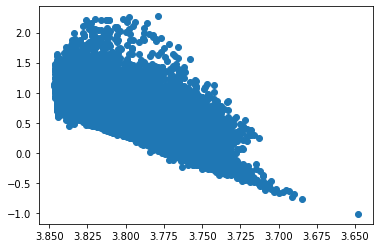

In [47]:
#hertz russel diagraM
plt.scatter(gena['logTe'],log_L_div_Ls)
plt.gca().invert_xaxis()


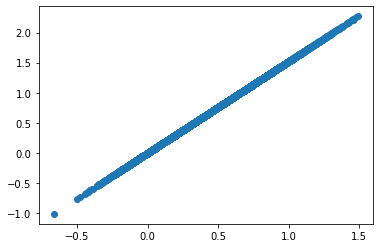

In [48]:
#MASS LUMInosity graph
plt.scatter(log_M_div_Ms,log_L_div_Ls)



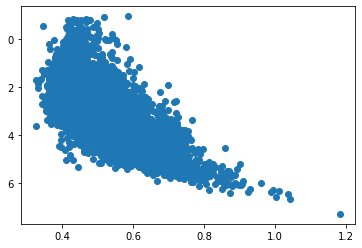

In [49]:
#color index magnitude, FIX THISSS   abs mag vs v-b
plt.scatter(vb,gena['VMag'])
plt.gca().invert_yaxis()


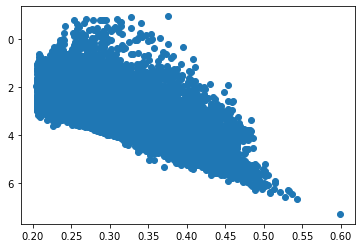

In [50]:
#color mag diag abs mag vs b-y
plt.scatter(gena['b-y'],gena['VMag'])
plt.gca().invert_yaxis()

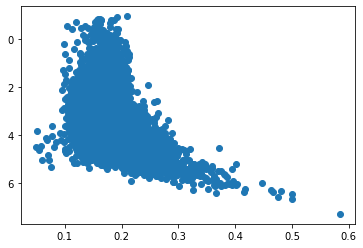

In [51]:
#color mag diag abs mag vs m1
plt.scatter(gena['m1'],gena['VMag'])
plt.gca().invert_yaxis()

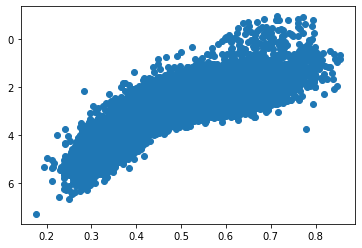

In [52]:
#color mag diag abs mag vs c1
plt.scatter(gena['c1'],gena['VMag'])
plt.gca().invert_yaxis()

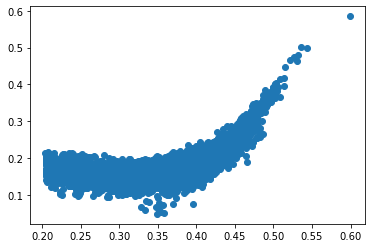

In [53]:
#b-y vs m1
plt.scatter(gena['b-y'],gena['m1'])


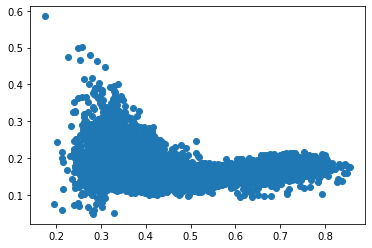

In [54]:
#m1 vs c1
plt.scatter(gena['c1'],gena['m1'])


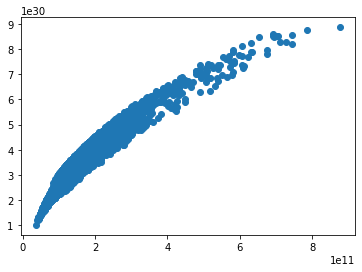

In [55]:
plt.scatter(R,Mass)


In [56]:
gena.to_csv('gena_py.csv')

AttributeError: 'DataFrame' object has no attribute 'lst'

In [63]:
os.chdir('New folder')
df = pd.read_csv('iso001.csv')


In [64]:
def data_split(filename):
    df = pd.read_csv(filename)
    keep = df.columns
    col_names = df.iloc[0]
    
    df.drop('#', axis=1, inplace=True)
    df.drop(0, axis=0, inplace=True)
    df.columns = col_names[:-1].values
    
    ages = df[df['# log(age/yr)'] == 'Isochrone']['logTe']
    ages.loc[0] = keep[5]
    
    ages.sort_index(inplace=True)
    ages = ages.to_frame()
    ages.reset_index(inplace=True)
    ages.rename(columns={'index':'row_number', 'logTe':'age'}, inplace=True)
    
    data = {}

    for i in ages.index:
        if i == 0:
            data[ages['age'][i]] = df.loc[0:ages['row_number'][i+1] - 1]
        elif i == ages.index[-1]:
            data[ages['age'][i]] = df.loc[ages['row_number'][i]:]
        else:
            data[ages['age'][i]] = df.loc[ages['row_number'][i] + 2:ages['row_number'][i+1] - 1]

    return data

In [74]:
data001 = data_split('iso001.csv')
data19=data_split('iso019nov.csv')

C:\ProgramData\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [75]:
data19.keys()

dict_keys(['6.310e+07 yr', '7.079e+07 yr', '7.943e+07 yr', '8.913e+07 yr', '1.000e+08 yr', '1.122e+08 yr', '1.259e+08 yr', '1.413e+08 yr', '1.585e+08 yr', '1.778e+08 yr', '1.995e+08 yr', '2.239e+08 yr', '2.512e+08 yr', '2.818e+08 yr', '3.162e+08 yr', '3.548e+08 yr', '3.981e+08 yr', '4.467e+08 yr', '5.012e+08 yr', '5.623e+08 yr', '6.310e+08 yr', '7.080e+08 yr', '7.943e+08 yr', '8.913e+08 yr', '1.000e+09 yr', '1.122e+09 yr', '1.259e+09 yr', '1.413e+09 yr', '1.585e+09 yr', '1.778e+09 yr', '1.995e+09 yr', '2.239e+09 yr', '2.512e+09 yr', '2.818e+09 yr', '3.162e+09 yr', '3.548e+09 yr', '3.981e+09 yr', '4.467e+09 yr', '5.012e+09 yr', '5.624e+09 yr', '6.310e+09 yr', '7.080e+09 yr', '7.943e+09 yr', '8.913e+09 yr', '1.000e+10 yr', '1.122e+10 yr', '1.259e+10 yr', '1.413e+10 yr', '1.585e+10 yr', '1.778e+10 yr'])

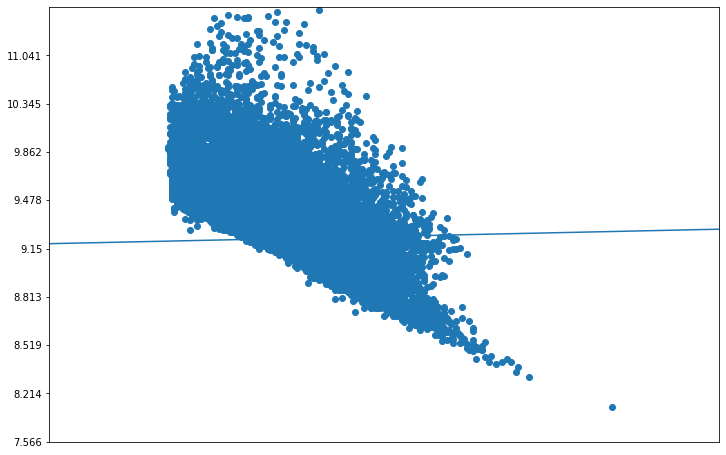

In [79]:
plt.figure(figsize=(12, 8))
plt.scatter(gena['logTe'],gena['VMag'])
plt.plot(data19['3.548e+09 yr']['logTe'],data19['3.548e+09 yr']['Mbol '])

plt.xlim(3.6, 3.9)
plt.ylim(-1, 8)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

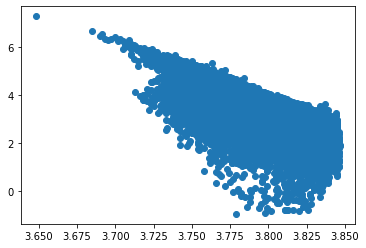

In [67]:
plt.scatter(gena['logTe'],gena['VMag'])


In [62]:
data001['1.778e+10 yr'].to_csv('1 78 gyr.csv')

NameError: name 'data001' is not defined

In [72]:
np.log(6203)

8.732788324973118